<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilty

## Probability Axioms
We begin with some definitions.

The sample space of an experiment, denoted by $S$, is the set of all possible outcomes of that experiment.

An event is any collection (subset) of outcomes contained in the sample space $S$. An event is simple if it consists of exactly one outcome and compound if it consists of more than one outcome.



Given an experiment and a sample space $S$, the probability distribution is a function which assign to each event a number $P(A)$, called the probability of the event $A$, which will give a precise measure of the chance that $A$ will occur. The probability assignments should satisfy the following axioms (basic properties) of probability.

*   For any event $A,1\geq P(A)\geq0$
*   $P(S)=1$
*   If $A_1,A_2,A_3,\cdots$ is an infinite collection of disjoint events, then $P(A_1\cup A_2\cup A_3\cup \cdots)=\sum_{i=1}^\infty P(A_i)$
*  For any event $A$, $P(A)+P(A′)=1$, from which $P(A)=1−P(A′)$
*   When events $A$ and $B$ are mutually exclusive, $P(A\cup B)=P(A)+P(B)$
*   For any two events $A$ and $B$, $P(A\cup B)=P(A)+P(B)−P(A\cap B)$




Consider an event $A$, with $N(A)$ denoting the number of outcomes contained in $A$. The probability of the event is given by
$$P(A)=\frac{N(A)}{N}$$

Consider the simple experiment of rolling a fair, six-sided die. We want to find the probability of rolling a particular value, say 6. Because each value has the same probability, we note that the probability of rolling a 6 (or any other value) is simply the reciprocal of the sample space. This is demonstrated in the following Python code.

In [3]:
# Creating a Sample Space
sample_space = {1, 2, 3, 4, 5, 6}
# Computing the probability
probability_six = 1 / len(sample_space)

print(f'Probability of rolling a six is {probability_six : .3f}')


Probability of rolling a six is  0.167


## Conditional Probability


For any two events $A$ and $B$ with $P(B)>0$, the conditional probability of $A$ given that $B$ has occurred is defined by $$P(A|B)=P(A\cap B)P(B)$$
Conditional probability give a rise to the multiplication rule $$P(A\cap B)=P(A|B)\cdot P(B)$$

Two events $A$ and $B$ are independent if $P(A|B)=P(A)(P(A\cap B)=P(A)\cdot P(B))$ and are dependent otherwise.

In general, events $A_1,\cdots,A_n$ are mutually independent if for every $k(k=2,3,\cdots,n)$ and every subset of indices $i_1,i_2,\cdots,i_k$,
$$P(A_{i_1}\cap A_{i_2}\cap \cdots \cap A_{i_k})=P(A_{i_1})\cdot P(A_{i_2})\cdots P(A_{i_k})$$

Below we provide a simple example of conditional probability in Python by calculating the probability of drawing a red card from a standard deck given that the card is a heart.

In [7]:


# Probability of drawing a red card from a standard deck given that the card is a heart
total_cards = 52
total_hearts = 13
total_red_cards = 26

# P(Heart and Red) = P(Heart), since all hearts are red
prob_heart_and_red = total_hearts / total_cards
# P(Red)
prob_red = total_red_cards / total_cards

conditional_prob = prob_heart_and_red / prob_red
print(f"Conditional probability of a heart given that it's red: {conditional_prob:.2f}")




Conditional probability of a heart given that it's red: 0.50


## Discrete Random Variables
A random variable is understood as a measurable function defined on a probability
space that maps from the sample space to the real numbers.
A random variable is described informally as a variable whose values depend
on outcomes of a random phenomenon. For a given sample space $S$ of some experiment, a random variable is any rule that associates a number with each outcome in $S$. In mathematical language, a random variable is a function whose domain is the sample space and whose range is the set of real numbers.

A discrete random variable is an random variable whose possible values either constitute a finite set or else can be listed in an infinite sequence. A random variable is continuous if both of the following apply:
1.   Its set of possible values consists all numbers in a single interval on the number line.

2.  No possible value of the variable has positive probability, that is, $P(X=c)=0$ for any possible value $c$.


The probability distribution or probability mass function ($pmf$) of a discrete random variable is defined for every number $x$ by
$$p(x)=P(X=x)=P(\text{all } s\in S:X(s)=x)$$


The cumulative distribution function (cdf) $F(x)$ of a discrete random variable variable $X$ with pmf $p(x)$ is defined for every number $x$ by $$F(x)=P(X\leq x)=\sum_{y:y\leq x}p(y)$$

### Expected Value and Variance
Let $X$ be a discrete random variable with set of possible values $D$ and pmf $p(x)$. The expected value or mean value of $X$, denoted by $E(X)$ or $\mu\times X$ or just $\mu$, is $$E(X)=\mu_X=\sum_{x\in D}x\cdot p(x)$$


Let $X$ have pmf $ p(x) $ and expected value $\mu$. Then the variance of $X$  is

$$
V(X) = \sum_x (x - \mu)^2 \cdot p(x) = E \left[ (X - \mu)^2 \right].
$$

The standard deviation (SD) of $X$ is

$$
\sigma_X = \sqrt{\sigma_X^2}.
$$

It is easy to verify the following:

$$
\sum_x (x - \mu)^2 \cdot p(x) = E \left[ (X - \mu)^2 \right].
$$


Below we explore these concepts in Python by defining a discrete random variable as the number of heads in $n$ coin flips. We consider the case $n=5$. We simulate the coin flips in order to calculate the pmf. We then calculate the expected value and variance. The results are summarized in two histograms.

PMF (Number of Heads):
P(X = 1) = 0.1514
P(X = 2) = 0.3070
P(X = 3) = 0.3201
P(X = 4) = 0.1580
P(X = 0) = 0.0313
P(X = 5) = 0.0322


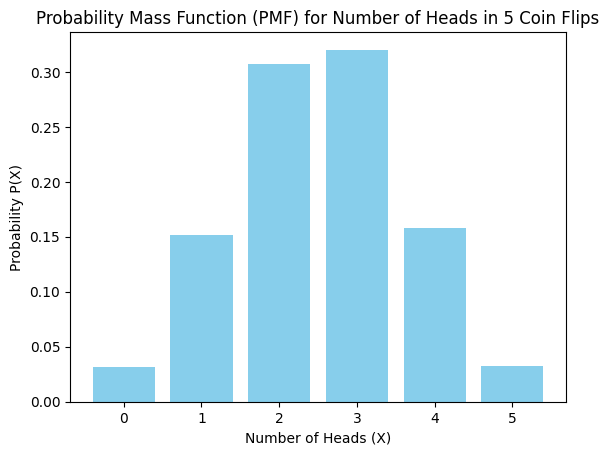

Expected Value (E[X]): 2.52
Variance (Var(X)): 1.25


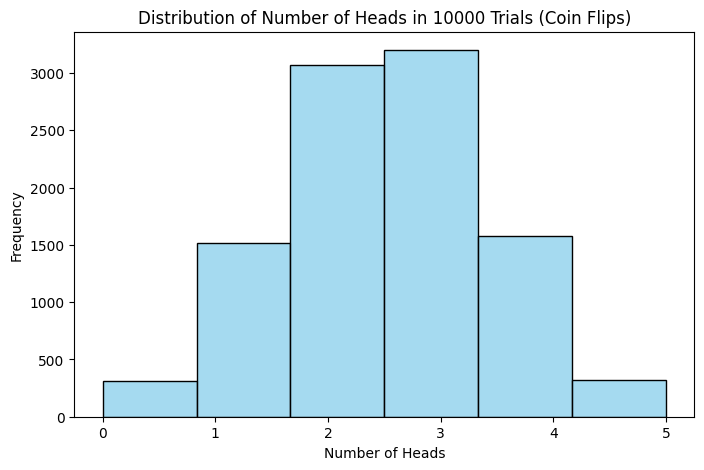

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Defining a Discrete Random Variable: Number of Heads in n Coin Flips
def simulate_coin_flips(n_flips, n_trials):
    # Simulate flipping a fair coin n_flips times, for n_trials trials
    results = np.random.binomial(n_flips, 0.5, n_trials)  # Binomial distribution
    return results

n_flips = 5    # Number of coin flips per trial
n_trials = 10000  # Number of trials

# Simulate the coin flips and get the outcomes
results = simulate_coin_flips(n_flips, n_trials)

# Probability Mass Function (PMF)
def probability_mass_function(results):
    counts = Counter(results)
    total_trials = len(results)
    pmf = {k: v / total_trials for k, v in counts.items()}
    return pmf

pmf = probability_mass_function(results)
print("PMF (Number of Heads):")
for k, v in pmf.items():
    print(f"P(X = {k}) = {v:.4f}")

# Visualize the PMF
plt.bar(pmf.keys(), pmf.values(), color='skyblue')
plt.xlabel('Number of Heads (X)')
plt.ylabel('Probability P(X)')
plt.title('Probability Mass Function (PMF) for Number of Heads in 5 Coin Flips')
plt.show()

# Expected Value and Variance
def expected_value(pmf):
    return sum(k * v for k, v in pmf.items())

def variance(pmf, mean):
    return sum((k - mean) ** 2 * v for k, v in pmf.items())

mean = expected_value(pmf)
var = variance(pmf, mean)

print(f"Expected Value (E[X]): {mean:.2f}")
print(f"Variance (Var(X)): {var:.2f}")

# Simulate Random Trials and Plot Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(results, bins=n_flips+1, kde=False, color='skyblue')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title(f'Distribution of Number of Heads in {n_trials} Trials (Coin Flips)')
plt.show()



## Continuous Random Variables
Let $X$ be a continuous random variable. Then a probability distribution or probability density function (pdf) of $X$ is a function $f(x)$ such that for any two numbers $a$ and $b$ with $a\leq b$,
$$P(a\leq X\leq b)=\int_a^b f(x)dx$$

### Expected Value and Variance
The expected or mean value of a continuous random variable $X$ with pdf $f(x)$ is $$\mu _X=E(X)=\int_{-\infty}^\infty x\cdot f(x)dx$$


The variance of a continuous random variable $X$ with pdf $f(x)$ and mean value $\mu$ is $$\sigma^2_X=V(X)=\int_{-\infty}^\infty (x-\mu)^2\cdot f(x)dx=E[(X-\mu)^2]$$


The standard deviation (SD) of $X$ is $\sigma_X=\sqrt{V(x)}$


### Normal Distribution

A continuous random variable $X$ is said to have a normal distribution with parameters $\mu$ and $\sigma$ (or $\mu$ and $\sigma^2$), where $-\infty <\mu<\infty$ and $0<\sigma$, if the pdf of $X$ is $$f(x;\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma}}e^{−(x−\mu)^2/(2\sigma^2)}\hspace{3mm}−\infty<x<\infty$$


The normal distribution with parameter values $\mu=0$ and $\sigma=1$ is called the standard normal distribution. A random variable having a standard normal distribution is called a standard normal random variable and will be denoted by $Z$. The pdf of $Z$ is $$f(z; 0,1)=\frac{1}{\sqrt{2\pi\sigma}}e^{−z^2/2}\hspace{3mm}−\infty<x<\infty$$


If $X$ has a normal distribution with mean $\mu$ and standard deviation $\sigma$,then
$$Z=\frac{X-\mu}{\sigma}$$
has a standard normal distribution

We explore these concepts in Python by defining a normal continuous random variable that describes height in centimeters. Suppose the parameters are given by
$$ μ=170 $$
$$ σ = 10 $$

We calculate the pdf, mean and variance of the simulated data, and the cdf. The results are summarized in a series of plots.

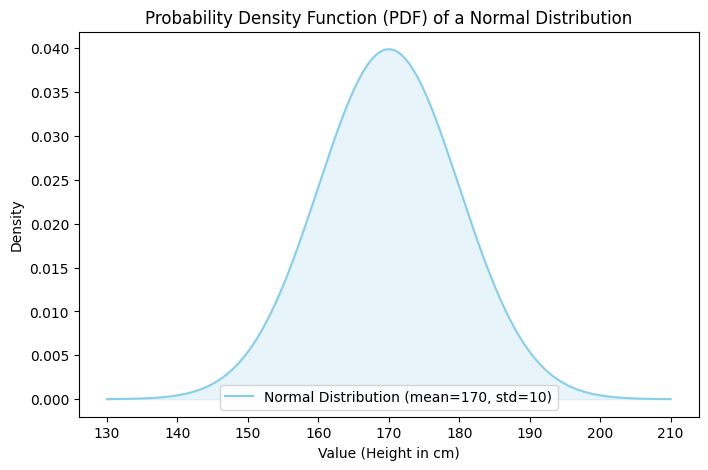

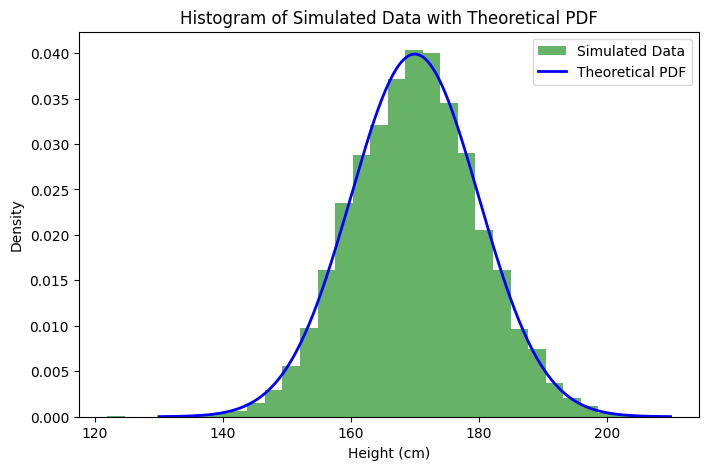

Mean of the simulated data: 170.08 cm
Variance of the simulated data: 98.79 cm^2


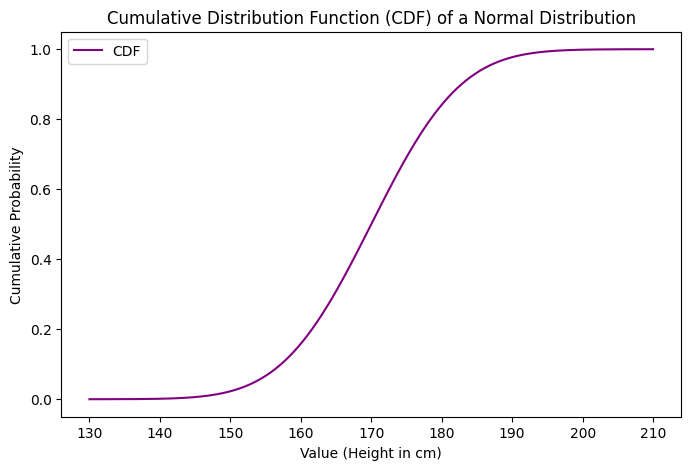

Probability of being between 160 cm and 180 cm: 0.6827


In [6]:

import scipy.stats as stats

# Defining a Continuous Random Variable: Normal Distribution (e.g., Heights)
mu = 170  # Mean height in cm
sigma = 10  # Standard deviation (spread) in cm

# Generate random samples from a normal distribution (representing heights)
n_samples = 10000
samples = np.random.normal(mu, sigma, n_samples)

# Probability Density Function (PDF)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the PDF
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f'Normal Distribution (mean={mu}, std={sigma})', color='skyblue')
plt.fill_between(x, pdf, alpha=0.2, color='skyblue')
plt.title('Probability Density Function (PDF) of a Normal Distribution')
plt.xlabel('Value (Height in cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Simulating Random Samples and Visualizing the Distribution
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Simulated Data')
plt.plot(x, pdf, color='blue', lw=2, label='Theoretical PDF')
plt.title('Histogram of Simulated Data with Theoretical PDF')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Mean and Variance of the Simulated Data
mean = np.mean(samples)
variance = np.var(samples)

print(f"Mean of the simulated data: {mean:.2f} cm")
print(f"Variance of the simulated data: {variance:.2f} cm^2")

# Cumulative Distribution Function (CDF)
cdf = stats.norm.cdf(x, mu, sigma)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(x, cdf, label='CDF', color='purple')
plt.title('Cumulative Distribution Function (CDF) of a Normal Distribution')
plt.xlabel('Value (Height in cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# Probability of a range of values using the CDF
# Probability that a person is between 160 cm and 180 cm
prob_160_180 = stats.norm.cdf(180, mu, sigma) - stats.norm.cdf(160, mu, sigma)
print(f"Probability of being between 160 cm and 180 cm: {prob_160_180:.4f}")
